In [28]:
# A notebook comparing the energy usages of different countries
#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import fill_between

%matplotlib inline

In [29]:
#Read Datasets
country = pd.read_csv('world-development-indicators/world-development-indicators/Country.csv')
country_notes = pd.read_csv('world-development-indicators/world-development-indicators/CountryNotes.csv')
indicators = pd.read_csv('world-development-indicators/world-development-indicators/Indicators.csv')

In [71]:
#Check it out
indicators.head()
            

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


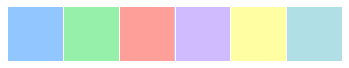

In [25]:
#Stylistic Options
#Lets get a nice array of colours
current_palette = sns.color_palette('pastel')
sns.palplot(current_palette)

In [19]:
#Define your countries of interest
COI = ["United Kingdom","Sweden","Australia","Hong Kong SAR, China","Malaysia"]

#Indicators of interest
IOI = ["EG.ELC.ACCS.ZS","EG.ELC.FOSL.ZS","EG.ELC.NUCL.ZS","EG.ELC.HYRO.ZS","EG.ELC.RNWX.ZS",
       "EG.ELC.NGAS.ZS","EG.ELC.COAL.ZS","EG.ELC.PETR.ZS","EG.USE.ELEC.KH.PC","EN.ATM.CO2E.KT"]

#Subset to countries and indicators of choice
sub_ind = indicators[(indicators["CountryName"].isin(COI))&(indicators['IndicatorCode'].isin(IOI))]
sub_ind.head()
print(sub_ind['CountryName'].unique())

['Australia' 'Hong Kong SAR, China' 'Sweden' 'United Kingdom' 'Malaysia']


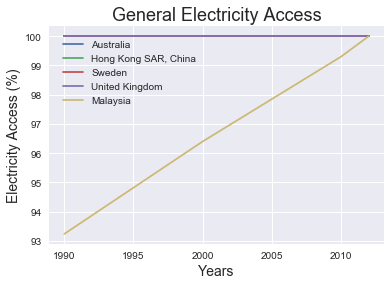

In [9]:
#So lets consider plotting the different metrics
#Lets start simple and plot the access to electricity over time in the different countries

fig = plt.figure()

for country in sub_ind["CountryName"].unique():
    sub = sub_ind[(sub_ind["CountryName"]==country)&(sub_ind["IndicatorCode"]=="EG.ELC.ACCS.ZS")]
    plt.plot(sub.Year,sub.Value,label=country)
    
plt.legend(loc=2, borderaxespad=1.)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('Electricity Access (%)',  fontsize=14)
plt.title('General Electricity Access', fontsize=18)

In [59]:
#Now lets make a general script for comparing one indicator
def plot_single_metric(sub_ind,metric,title,normalise=False):
    fig = plt.figure()

    for country in sub_ind["CountryName"].unique():
        sub = sub_ind[(sub_ind["CountryName"]==country)&(sub_ind["IndicatorCode"]==metric)]
        #Normalise to population
        if(normalise):
            pop = sub_ind[(sub_ind["CountryName"]==country)&
                                 (sub_ind["IndicatorCode"]=="")]
            
            print(pop.Value)
            values = sub.Value.as_matrix()#/pop_values.as_matrix()
            plt.plot(sub.Year,values,label=country)
                                                                                    
        else:                                                                
            plt.plot(sub.Year,sub.Value,label=country)
    
    plt.legend(loc=2, borderaxespad=1.)
    plt.xlabel('Years',  fontsize=14)
    plt.ylabel('Value',  fontsize=14)
    plt.title(title, fontsize=18)
    return()


()

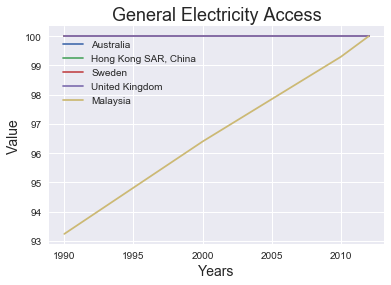

In [60]:
#Lets test it by recreating the above plot
plot_single_metric(sub_ind,"EG.ELC.ACCS.ZS","General Electricity Access")

()

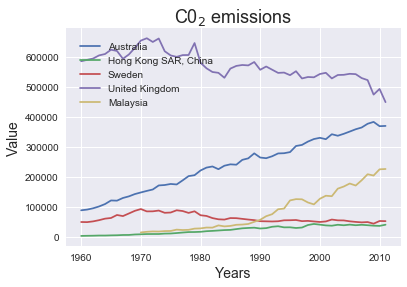

In [62]:
#Lets try for C02 emissions
plot_single_metric(sub_ind,"EN.ATM.CO2E.KT","C0$_2$ emissions")

()

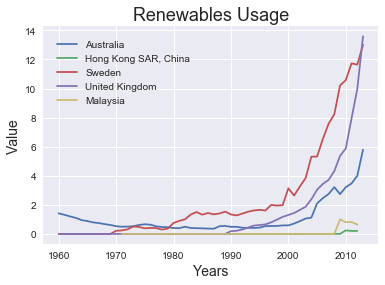

In [13]:
#Now lets check out how renewables have improved over the years
plot_single_metric(sub_ind,"EG.ELC.RNWX.ZS","Renewables Usage")

In [14]:
#Lets check out the breakdown of the electricity production in the different countries
def multi_metrics(df,country,metrics,title):
    fig = plt.figure()
    
    prev_values= 0
    
    for metric in metrics:
        sub = df[(df["CountryName"]==country)&(df["IndicatorCode"]==metric)]
        plt.plot(sub.Year,sub.Value,label=metric)
        prev_values = (sub['Value'].copy()).as_matrix()
    
    plt.legend(loc=2, borderaxespad=1.)
    plt.xlabel('Years',  fontsize=14)
    plt.ylabel('Value',  fontsize=14)
    plt.title(title, fontsize=18)
    return()

()

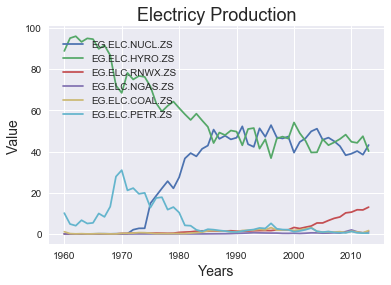

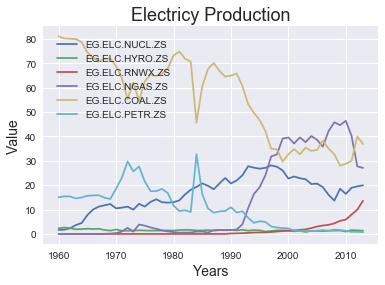

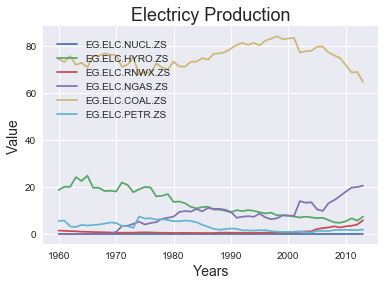

In [15]:
metrics = ["EG.ELC.NUCL.ZS","EG.ELC.HYRO.ZS","EG.ELC.RNWX.ZS",
       "EG.ELC.NGAS.ZS","EG.ELC.COAL.ZS","EG.ELC.PETR.ZS"]
multi_metrics(sub_ind,"Sweden",metrics,"Electricy Production")
multi_metrics(sub_ind,"United Kingdom",metrics,"Electricy Production")
multi_metrics(sub_ind,"Australia",metrics,"Electricy Production")

In [16]:
#This is a littel messy, lets try to make a stacked version...
#Lets check out the breakdown of the electricity production in the different countries
def stack_multi_metrics(df,country,metrics,title):
    fig = plt.figure()
    ax = plt.subplot(111)
    
    prev_values= 0
    
    for metric in metrics:
        sub = df[(df["CountryName"]==country)&(df["IndicatorCode"]==metric)]
        cum_sum = sub['Value'].as_matrix() + prev_values 
        col = current_palette[metrics.index(metric)]
        plt.plot(sub.Year,cum_sum,label=metric,color=col)
        fill_between(sub.Year,prev_values,cum_sum,facecolor=col,alpha=0.7)
        prev_values = cum_sum
    
    plt.legend(loc=2, borderaxespad=1.)
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.xlabel('Years',  fontsize=14)
    plt.ylabel('Value',  fontsize=14)
    plt.title(title, fontsize=18)
    return()

()

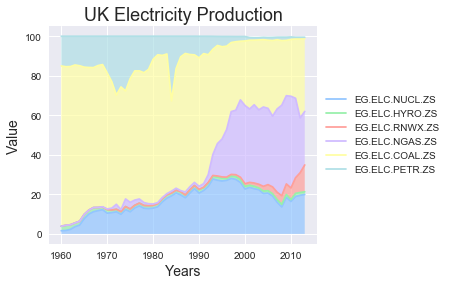

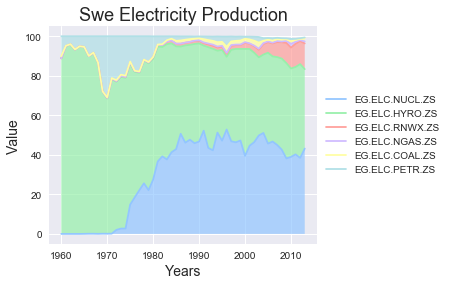

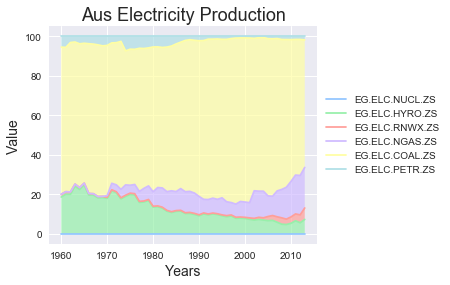

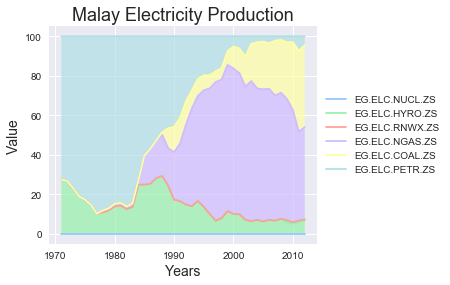

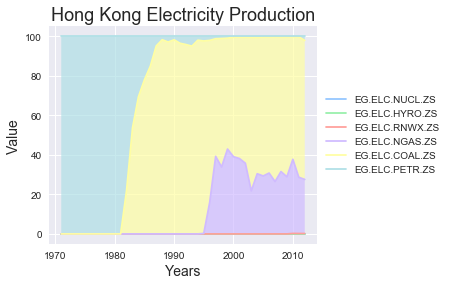

In [20]:
stack_multi_metrics(sub_ind,"United Kingdom",metrics,"UK Electricity Production")
stack_multi_metrics(sub_ind,"Sweden",metrics,"Swe Electricity Production")
stack_multi_metrics(sub_ind,"Australia",metrics,"Aus Electricity Production")
stack_multi_metrics(sub_ind,"Malaysia",metrics,"Malay Electricity Production")
stack_multi_metrics(sub_ind,"Hong Kong SAR, China",metrics,"Hong Kong Electricity Production")